# Life Expectancy and GDP

<span style="font-size: 15px;">
    In this project, we explore the relationship between GDP and life expectancy during the years 2000-2015 of six different countries: Zimbabwe, China, Chile, United States, Germany and Mexico. <br>
    
The goal is to be able to answer these main questions along the notebook: <Br>
(1) How did GDP and life expectancy change over these years? <br>
(2) Is there a correlation between GDP and life expectancy? <br>
(3) Is this relationship the same for all countries? What does it look like when aggregated? <br>
(4) How are the distributions of GDP and life expectancy across different countries?

### Importing libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

sns.set_theme(palette='colorblind', style='white')

## 1 - Exploratory Data Analysis

In [55]:
data = pd.read_csv('../data/all_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [56]:
data = data.rename(columns={'Life expectancy at birth (years)':'life_expectancy', 'Country':'country', 'GDP':'gdp',\
                           'Year':'year'})
data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [57]:
# Checking unique values for countries and years
data['country'] = data['country'].replace({'United States of America':'USA'})
countries = list(data['country'].unique())
print(f'{len(countries)} countries:')
print(countries)

years = list(data['year'].unique())
print(f'{len(years)} years:')
print(years)

6 countries:
['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
16 years:
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [58]:
# Aggregating data
year_df = pd.DataFrame(data.groupby('year').mean(numeric_only=True))
year_df.head()

,life_expectancy,gdp
year,,
2000,70.766667,2.371583e+12
2001,70.833333,2.448752e+12
2002,70.950000,2.561221e+12
2003,71.033333,2.743446e+12
2004,71.300000,2.991647e+12


### Life Expectancy and GDP during 2000-2015 - aggregated data

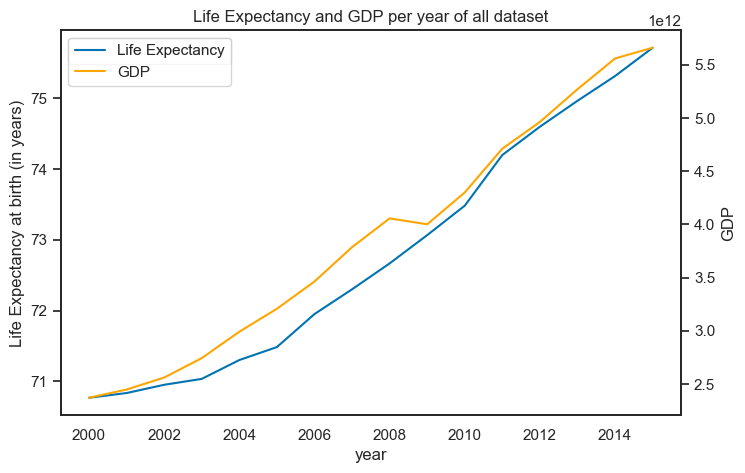

In [59]:
plt.figure(figsize=(8, 5))
plt.title('Life Expectancy and GDP per year of all dataset')
# Primary axis plot
l1 = sns.lineplot(data=year_df, x=year_df.index, y='life_expectancy', label='Life Expectancy')
plt.ylabel('Life Expectancy at birth (in years)')

# Secondary axis plot
ax2 = plt.gca().twinx()
l2 = sns.lineplot(data=year_df, x=year_df.index, y='gdp', ax=ax2, color='orange', label='GDP')
ax2.set_ylabel('GDP')

# Get handles and labels for the legend
lines1, labels1 = l1.get_legend_handles_labels()
lines2, labels2 = l2.get_legend_handles_labels()

# Combine handles and labels
lines = lines1 + lines2
labels = labels1 + labels2

# Add legend to the primary axis
plt.legend(lines, labels, loc='upper left')

plt.show()

- <span style="font-size: 15px;">On the aggregated data, GDP and life expectancy seem to have grew together along these years. despite the differing scales of the variables, GDP appears to have initially increased at a relatively faster rate than life expectancy. However, GDP experienced a significant decline from 2008 to 2009 before resuming its growth. <br>
- <span style="font-size: 15px;"> In contrast, life expectancy consistently increased throughout these years. <br>
- <span style="font-size: 15px;">The linear aspect of this graph for both variables throughout the years might be partially explained by considering that aggregating data from multiple countries can neutralize individual fluctuations.
<br>
- <span style="font-size: 15px;">Analyzing the aggregated data of the six countries, it appears that GDP and life expectancy are strongly correlated during these years,  with GDP being significantly affected in 2008, possibly due to the financial crisis.

### Life Expectancy and GDP during 2000-2015 for each country

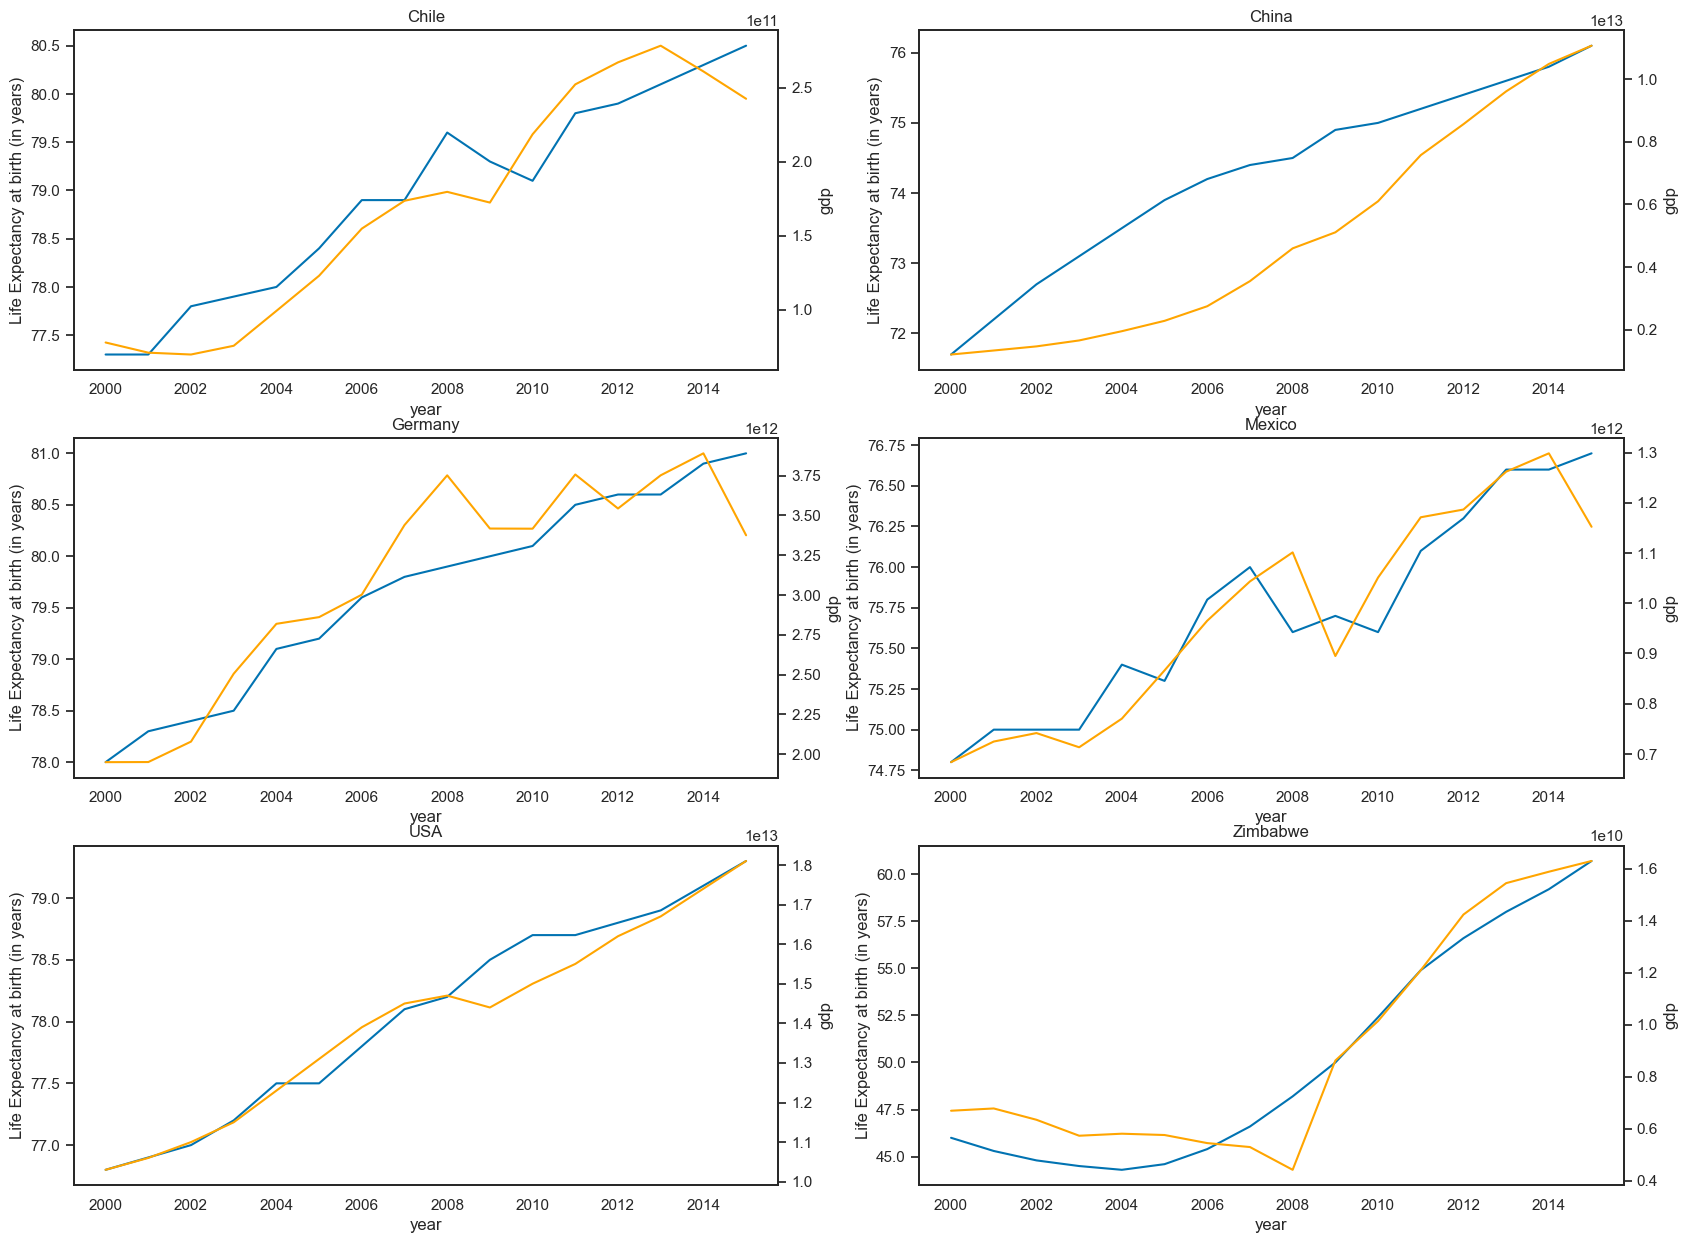

In [60]:
plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.lineplot(data=data[data['country']==country], x='year', y='life_expectancy')
    plt.ylabel('Life Expectancy at birth (in years)')
    ax2 = plt.twinx()
    sns.lineplot(data=data[data['country']==country], x='year', y='gdp', ax=ax2, color='orange')

- <span style="font-size: 15px;">Life expectancy and GDP evolved differently among the various countries compared to the aggregated data <br>
- <span style="font-size: 15px;">There are notable differences among countries in their rates, directions, and variability of change of both GDP and life expectancy, as well as in the scales of these variables. Yet overall, both indicators improved during this period for all countries <br>
- <span style="font-size: 15px;">These variations indicate that the factors influencing GDP also impact life expectancy, with the relationship differing across different national contexts

## Countries' Life Expectancy at birth (in years)

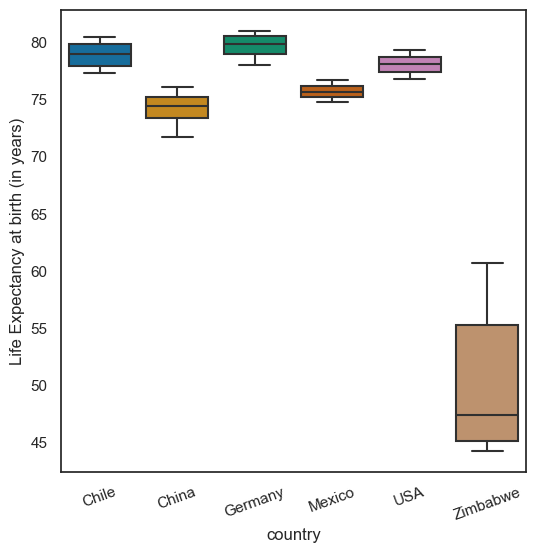

In [61]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="country", y="life_expectancy")
plt.ylabel('Life Expectancy at birth (in years)')
plt.xticks(rotation=20);

In [62]:
data.groupby('country').agg({'life_expectancy':['mean', 'std', 'max', 'min']})

life_expectancy                      
                    mean       std   max   min
country                                       
Chile           78.94375  1.058911  80.5  77.3
China           74.26250  1.318016  76.1  71.7
Germany         79.65625  0.975000  81.0  78.0
Mexico          75.71875  0.620987  76.7  74.8
USA             78.06250  0.832566  79.3  76.8
Zimbabwe        50.09375  5.940311  60.7  44.3

- <span style="font-size: 15px;"> Zimbabwe had the greatest increase so it presents the highest variability of life expectancy, but it is still more than 15 years behind the other countries.
- <span style="font-size: 15px;">The country with the least increase in life expectancy was Mexico and the country with the highest life expectancy is Germany.

# GDP

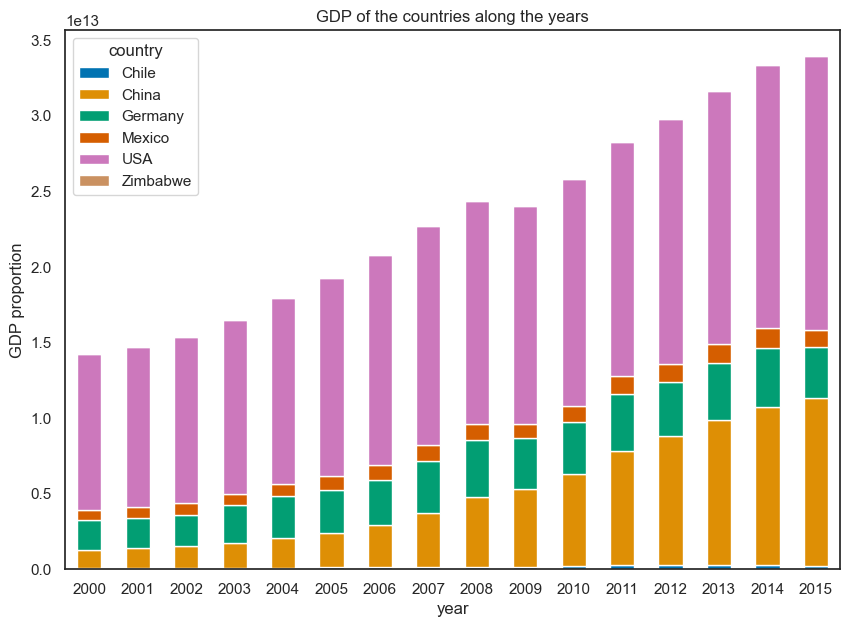

In [80]:
# First, pivot the data to get the correct format for stacking
data_pivot = data.pivot_table(index='year', columns='country', values='gdp', aggfunc='sum', fill_value=0)

# Create a stacked bar plot
data_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('GDP of the countries along the years')
plt.xticks(rotation=0)
plt.ylabel('GDP proportion');

In [66]:
data.groupby('country').agg({'gdp':['mean', 'std', 'max', 'min']})

gdp                                          
                  mean           std           max           min
country                                                         
Chile     1.697888e+11  7.687884e+10  2.783840e+11  6.973681e+10
China     4.957714e+12  3.501096e+12  1.106470e+13  1.211350e+12
Germany   3.094776e+12  6.674862e+11  3.890610e+12  1.949950e+12
Mexico    9.766506e+11  2.095716e+11  1.298460e+12  6.836480e+11
USA       1.407500e+13  2.432694e+12  1.810000e+13  1.030000e+13
Zimbabwe  9.062580e+09  4.298310e+09  1.630467e+10  4.415703e+09

- <span style="font-size: 15px;"> Due to the different orders of magnitude in GDP across countries, the GDP of Chile is almost not visible in the graph, while Zimbabwe's GDP stands out disproportionately
- <span style="font-size: 15px;">China experienced the largest relative increase in GDP during these years

## 2 - Regressing Life Expectancy on GDP

<span style="font-size: 15px;"> Given the complexity of the relationship between GDP and life expectancy, where one variable does not directly influence the other in a straightforward manner, it is still valuable to explore how well a linear regression model can predict life expectancy using GDP. This analysis can offer insights into the degree of correlation between these variables.

In [81]:
ols_countries = {}

for country in countries:
    df = data[data['country']==country]
    model = sm.OLS(df['gdp'], df['life_expectancy'])
    results = model.fit()
    ols_countries[country] = results.rsquared

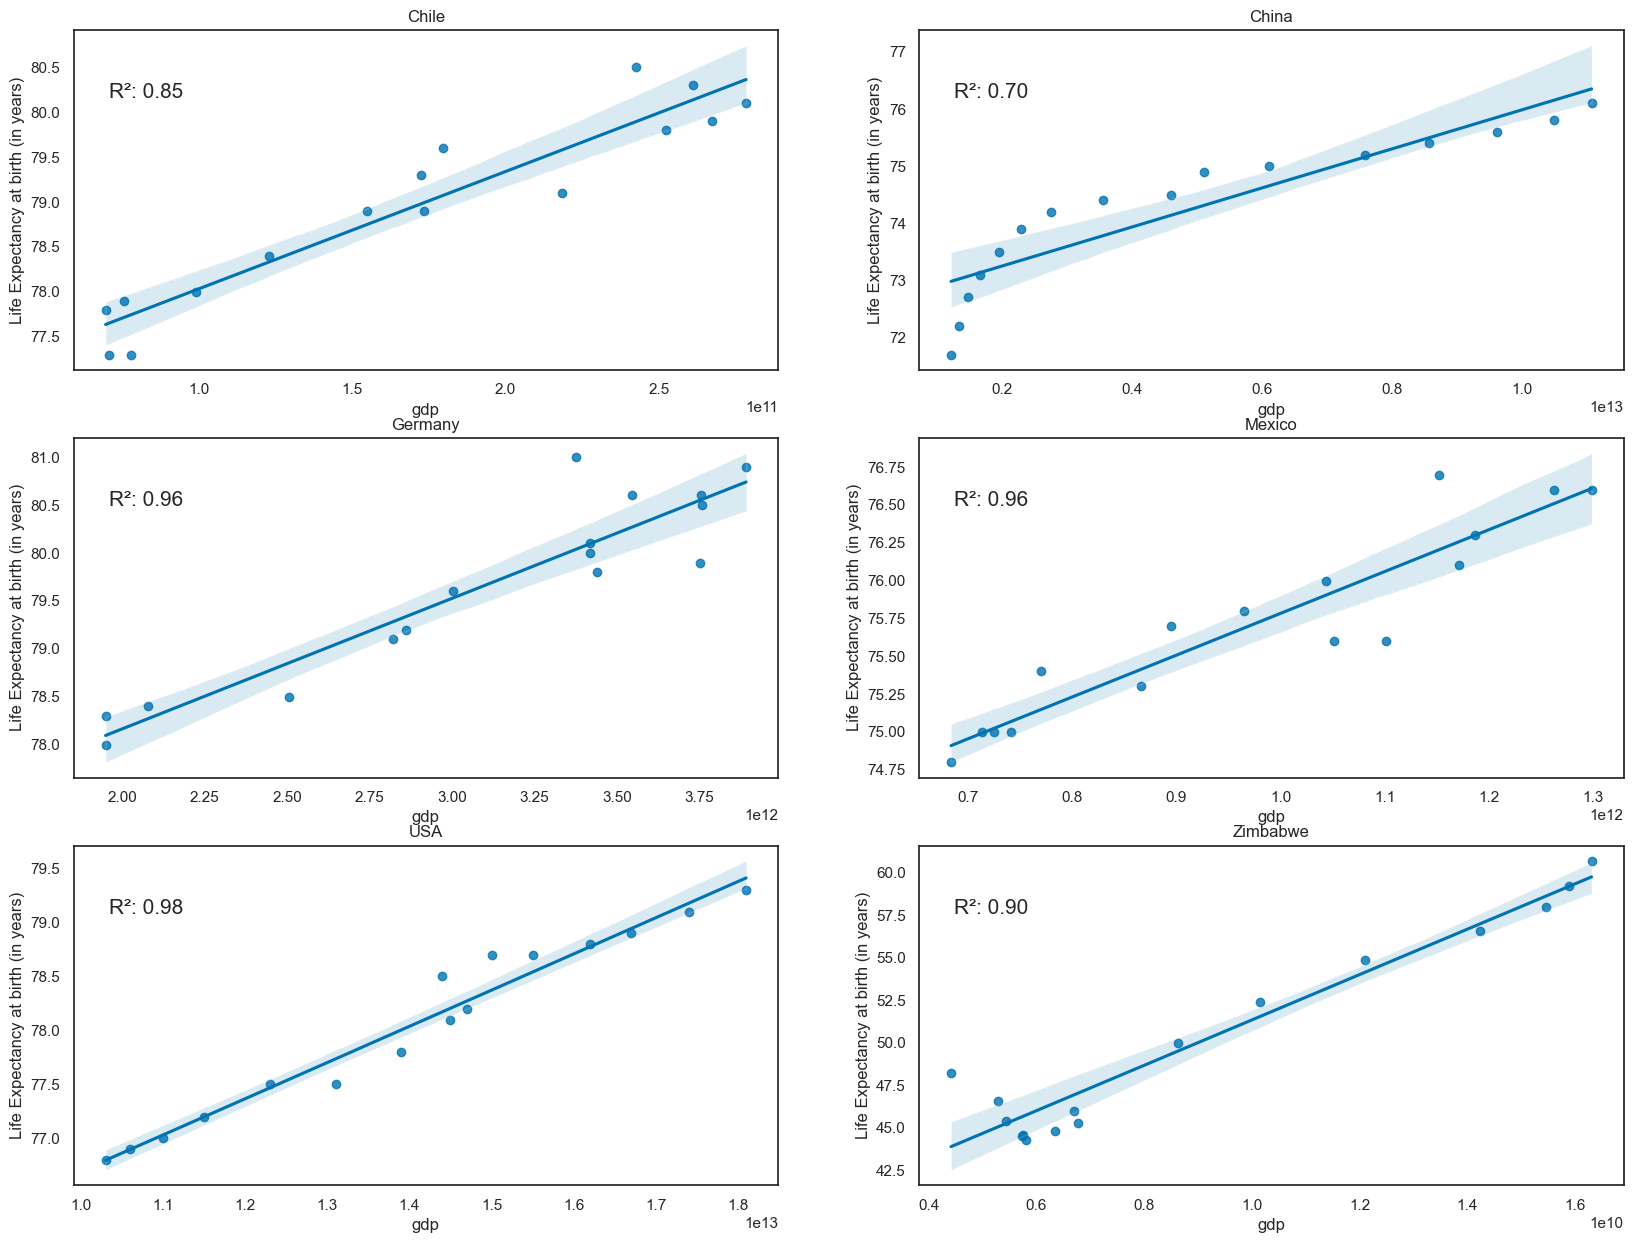

In [82]:
plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.regplot(data=data[data['country']==country], x='gdp', y='life_expectancy')
    plt.annotate(f'R²: {ols_countries[country]:.2f}',xy=(0.05,0.8),xycoords='axes fraction', fontsize=15)
    plt.ylabel('Life Expectancy at birth (in years)')

- <span style="font-size: 15px;"> Based on the R2 scores of the linear models, a significant portion of the variance in GDP was translated to variance in life expectancy. The USA shows a better fit for the linear model, indicating a stronger correlation between GDP and life expectancy, despite some fluctuations in the middle years. In contrast, China's data exhibits more non-linearity in this relationship.

## 3 - Conclusions

- <span style="font-size: 15px;">During the period analyzed, both GDP and life expectancy improved overall <br>
- <span style="font-size: 15px;">The variables were very correlated, some years and some countries more than the others<br>
- <span style="font-size: 15px;">Countries presented differences in scale, direction and variability of change in these variables, but when data was aggregated these fluctuations were more nuanced<br>
- <span style="font-size: 15px;">Besides Zimbabwe, life expectancy distributions for the countries were not so different. When it comes to GDP, the distributions are very different <br>
- <span style="font-size: 15px;">Although it was possible to see a correlation among the variables, more data is necessary to accurately describe the variables' correlation strength and form. It's important to remember that correlation does not imply causation.